In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [110]:
df = pd.read_csv('~/Documentos/MEGA/netflix_titles.csv')

In [111]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [112]:
df.shape

(7787, 12)

In [113]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [114]:
(df.isnull().sum()*100)/len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

<AxesSubplot:>

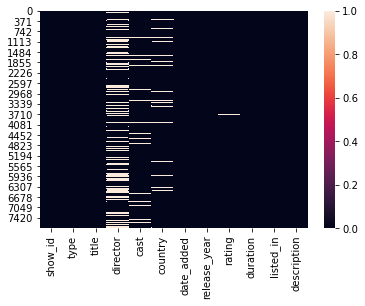

In [115]:
sns.heatmap(df.isnull())

In [116]:
df[df['country'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
...,...,...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7746,s7747,TV Show,دفعة القاهرة,NaN,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [117]:
(df['country'].value_counts()*100)/len(df)

United States                                                      32.811095
India                                                              11.853088
United Kingdom                                                      5.098241
Japan                                                               2.902273
South Korea                                                         2.350071
                                                                     ...    
United States, China, Canada                                        0.012842
United Kingdom, Spain                                               0.012842
Germany, United States, Canada                                      0.012842
China, United Kingdom                                               0.012842
United Kingdom, United States, Germany, Denmark, Belgium, Japan     0.012842
Name: country, Length: 681, dtype: float64

In [118]:
df['country'].unique()[-5:]

array(['Croatia, Slovenia, Serbia, Montenegro', 'Japan, Canada',
       'United States, France, South Korea, Indonesia',
       'United Arab Emirates, Jordan',
       'Sweden, Czech Republic, United Kingdom, Denmark, Netherlands'],
      dtype=object)

In [119]:
country = df.loc[df.country.notnull(), 'country'].astype('str').apply(lambda t: t.split(', '))
country = list(country)
len(country)

7280

In [120]:
encoder = TransactionEncoder().fit(country)
df_country = encoder.transform(country)
df_country = pd.DataFrame(df_country, columns = encoder.columns_, index=df.loc[df.country.notnull(), 'show_id'])
df_country.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,"United Kingdom,",United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
show_id,,,,,,,,,,,,,,,,,,,,,
s1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
s5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


Text(0, 0.5, 'Producciones')

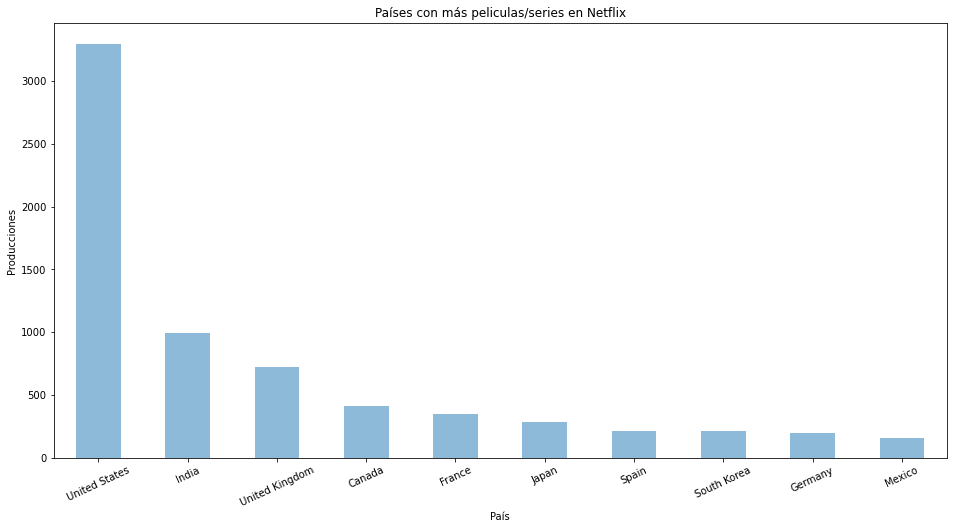

In [136]:
plt.figure(figsize=(16,8))
df_country.sum().sort_values(ascending=False).head(10).plot.bar(alpha=0.5)
plt.xticks(rotation=25)
plt.title('Países con más peliculas/series en Netflix')
plt.xlabel('País')
plt.ylabel('Producciones')

In [122]:
listed = df.loc[df['listed_in'].notnull(), 'listed_in'].astype('str').apply(lambda t: t.split(', '))
listed = list(listed)
len(listed)

7787

In [123]:
encoder = TransactionEncoder().fit(listed)
df_listed = encoder.transform(listed)
df_listed = pd.DataFrame(df_listed, columns = encoder.columns_, index=df.loc[df['listed_in'].notnull(), 'show_id'])
df_listed.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
show_id,,,,,,,,,,,,,,,,,,,,,
s1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
s2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0, 0.5, 'Producciones')

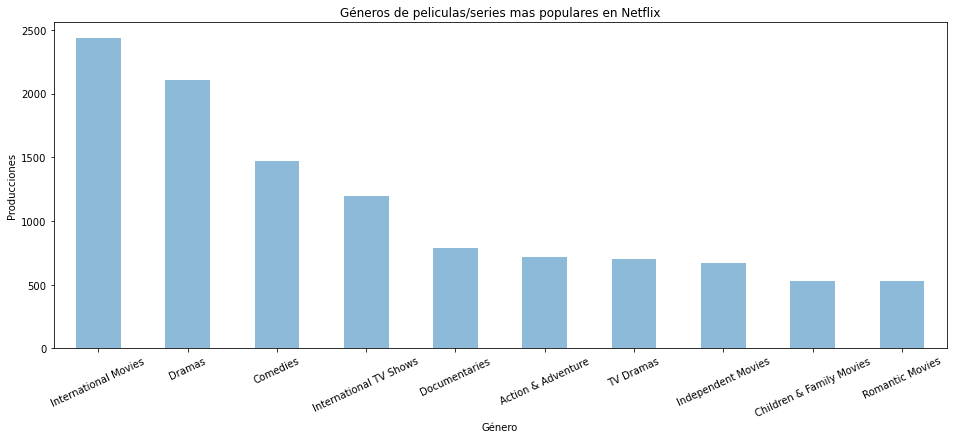

In [143]:
plt.figure(figsize=(16,6))
df_listed.sum().sort_values(ascending=False).head(10).plot.bar(alpha=0.5)
plt.xticks(rotation=25)
plt.title('Géneros de peliculas/series mas populares en Netflix')
plt.xlabel('Género')
plt.ylabel('Producciones')

In [223]:
chile = list(df_country.loc[df_country['Chile'] == True].index)
df_listed_chile = df_listed[df_listed.index.isin(chile)]
df_listed_chile

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
show_id,,,,,,,,,,,,,,,,,,,,,
s333,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s619,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
s708,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
s755,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
s1886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s1891,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
s1963,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
s2087,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
s2565,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0, 0.5, 'Producciones')

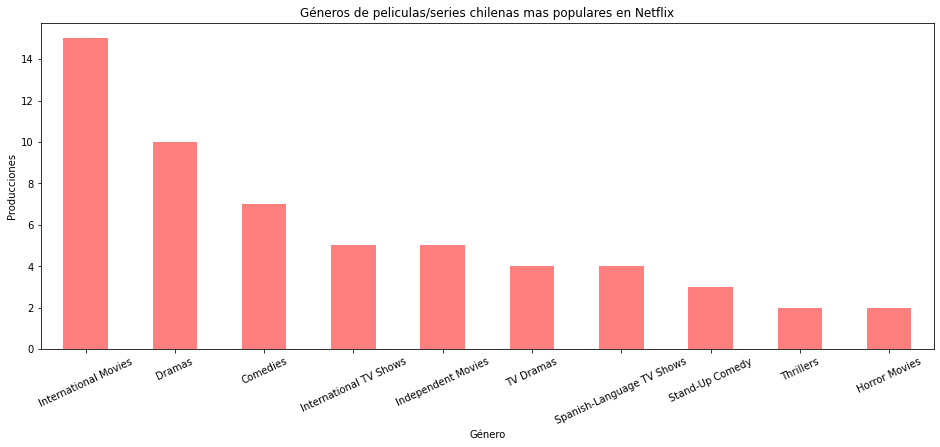

In [226]:
plt.figure(figsize=(16,6))
df_listed_chile.sum().sort_values(ascending=False).head(10).plot.bar(alpha=0.5, color='r')
plt.xticks(rotation=25)
plt.title('Géneros de peliculas/series chilenas mas populares en Netflix')
plt.xlabel('Género')
plt.ylabel('Producciones')

In [ ]:
# to be continued...